In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#df = pd.read_csv('2013/201306-citibike-tripdata.csv')
df = pd.read_csv("Collisions/accident.csv")
df = df[["CRASH DATE","CRASH TIME","LATITUDE","LONGITUDE","LOCATION","NUMBER OF PERSONS INJURED","NUMBER OF PERSONS KILLED","NUMBER OF PEDESTRIANS INJURED","NUMBER OF PEDESTRIANS KILLED","NUMBER OF CYCLIST INJURED","NUMBER OF CYCLIST KILLED","NUMBER OF MOTORIST INJURED","NUMBER OF MOTORIST KILLED",'ON STREET NAME']]
df["CRASH DATE"]=pd.to_datetime(df["CRASH DATE"])#.groupby("CRASH DATE").sum().plot()

/tmp/ipykernel_15168/3247473053.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Collisions/accident.csv")


In [11]:
bicycle_crashes = df[(df["NUMBER OF CYCLIST INJURED"]>0) | (df["NUMBER OF CYCLIST KILLED"]>0)]

/tmp/ipykernel_15168/1914788547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicycle_crashes['Year'] = bicycle_crashes['CRASH DATE'].dt.year


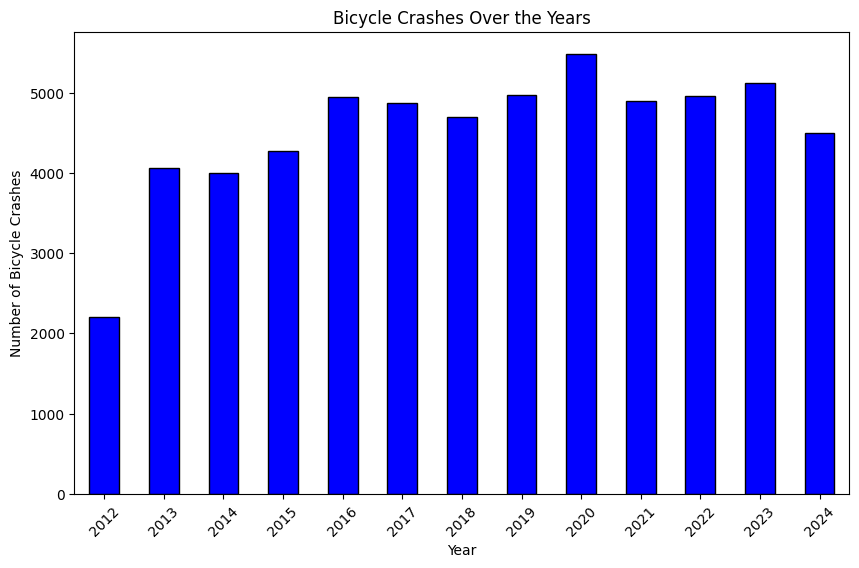

In [12]:
# Plot bicycle crashes over the years
bicycle_crashes['Year'] = bicycle_crashes['CRASH DATE'].dt.year
crashes_per_year = bicycle_crashes.groupby('Year').size()

plt.figure(figsize=(10, 6))
crashes_per_year.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Bicycle Crashes')
plt.title('Bicycle Crashes Over the Years')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_15168/2635443953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicycle_crashes['Month'] = bicycle_crashes['CRASH DATE'].dt.to_period('M')


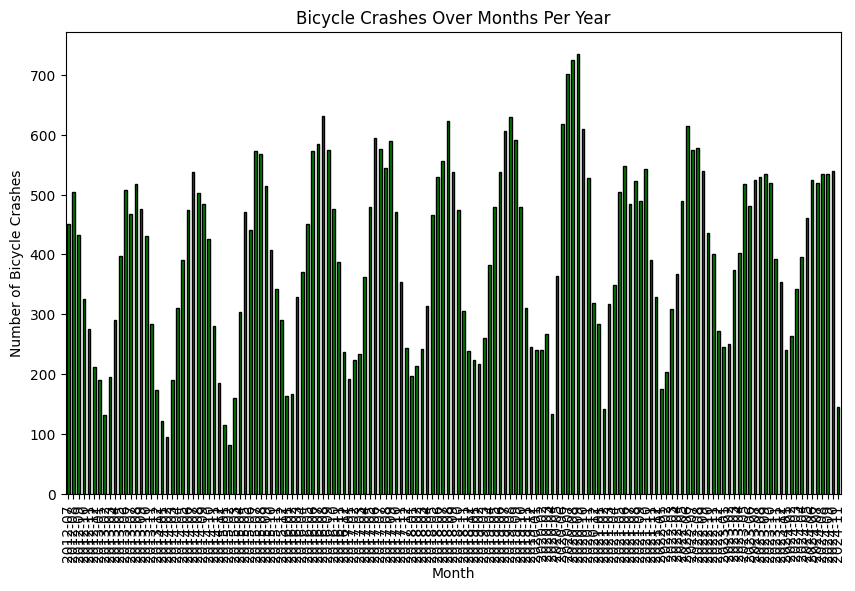

In [13]:
# Plot bicycle crashes over months per year
bicycle_crashes['Month'] = bicycle_crashes['CRASH DATE'].dt.to_period('M')
crashes_per_month = bicycle_crashes.groupby('Month').size()

plt.figure(figsize=(10, 6))
crashes_per_month.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Bicycle Crashes')
plt.title('Bicycle Crashes Over Months Per Year')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_15168/3466956808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicycle_crashes['Month'] = bicycle_crashes['CRASH DATE'].dt.to_period('M')


Months with the least amount of crashes:
Month
2015-02     82
2014-02     95
2015-01    115
2014-01    121
2013-02    131
Freq: M, dtype: int64


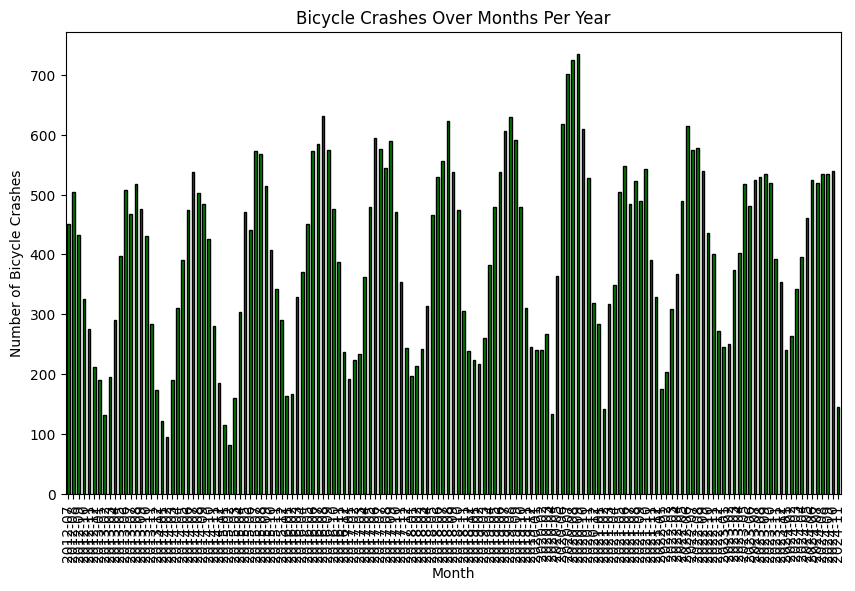

In [14]:

# Plot bicycle crashes over months per year
bicycle_crashes['Month'] = bicycle_crashes['CRASH DATE'].dt.to_period('M')
crashes_per_month = bicycle_crashes.groupby('Month').size()

# Find the months with the least amount of crashes
least_crashes = crashes_per_month.nsmallest(5)  # Adjust the number to display more or fewer months

print("Months with the least amount of crashes:")
print(least_crashes)

# Plot bicycle crashes over months per year
plt.figure(figsize=(10, 6))
crashes_per_month.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Bicycle Crashes')
plt.title('Bicycle Crashes Over Months Per Year')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_15168/3572983180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicycle_crashes['Month'] = bicycle_crashes['CRASH DATE'].dt.to_period('M')


Months with the least amount of crashes:
Month
2015-02     82
2014-02     95
2015-01    115
2014-01    121
2013-02    131
Freq: M, dtype: int64


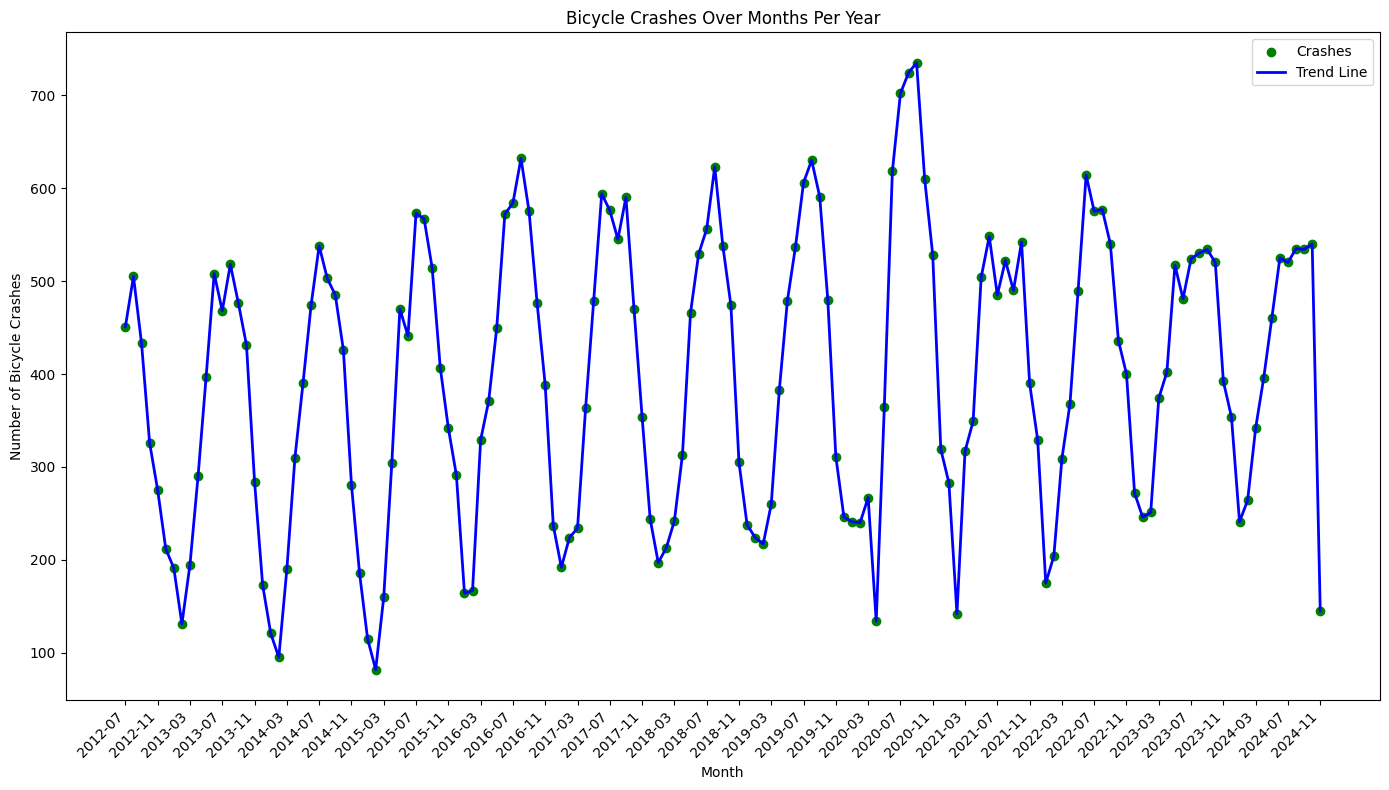

In [15]:
bicycle_crashes['Month'] = bicycle_crashes['CRASH DATE'].dt.to_period('M')
crashes_per_month = bicycle_crashes.groupby('Month').size()

# Find the months with the least amount of crashes
least_crashes = crashes_per_month.nsmallest(5)  # Adjust the number to display more or fewer months

print("Months with the least amount of crashes:")
print(least_crashes)

# Plot a scatter plot with a line drawn through the points
# Plot a scatter plot with a line drawn through the points
# Plot a scatter plot with a line drawn through the points
plt.figure(figsize=(14, 8))
plt.scatter(crashes_per_month.index.astype(str), crashes_per_month, color='green', label='Crashes')
plt.plot(crashes_per_month.index.astype(str), crashes_per_month, color='blue', linestyle='-', linewidth=2, label='Trend Line')
plt.xlabel('Month')
plt.ylabel('Number of Bicycle Crashes')
plt.title('Bicycle Crashes Over Months Per Year')

# Adjust x-axis to show only every 4th date
xticks = crashes_per_month.index[::4].astype(str)
plt.xticks(ticks=xticks, rotation=45, ha='right')

plt.tight_layout()
plt.legend()
plt.show()

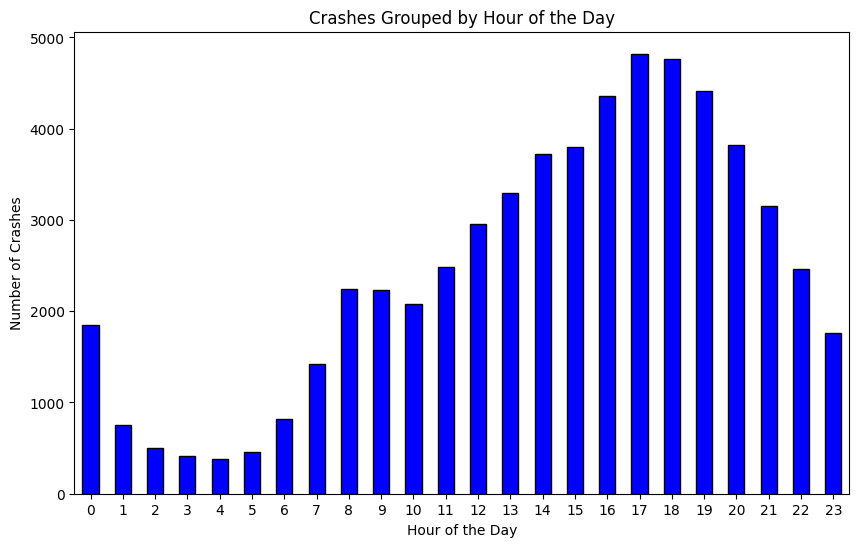

In [16]:

# Convert CRASH DATE and CRASH TIME columns to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.time
df= bicycle_crashes
# Combine CRASH DATE and CRASH TIME into a single datetime column
df['CRASH DATETIME'] = pd.to_datetime(df['CRASH DATE'].astype(str) + ' ' + df['CRASH TIME'].astype(str))

# Extract hour from CRASH DATETIME
df['Hour'] = df['CRASH DATETIME'].dt.hour

# Group by hour and count crashes
crashes_per_hour = df.groupby('Hour').size()

# Plot the data
plt.figure(figsize=(10, 6))
crashes_per_hour.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.title('Crashes Grouped by Hour of the Day')
plt.xticks(rotation=0)
plt.show()

In [17]:
df_accidents = pd.read_csv("Collisions/accident.csv")
#df_accidents["CRASH DATE"]=pd.to_datetime(df["CRASH DATE"])
#df_bikes = pd.read_csv('2013/201306-citibike-tripdata.csv')
df.starttime=pd.to_datetime(df.starttime)
df.starttime=df.starttime.dt.date
df.starttime=pd.to_datetime(df.starttime)
# Select relevant columns from accidents DataFrame
df_accidents = df_accidents[["CRASH DATE", "CRASH TIME", "LATITUDE", "LONGITUDE", "LOCATION", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED", "NUMBER OF PEDESTRIANS INJURED", "NUMBER OF PEDESTRIANS KILLED", "NUMBER OF CYCLIST INJURED", "NUMBER OF CYCLIST KILLED", "NUMBER OF MOTORIST INJURED", "NUMBER OF MOTORIST KILLED"]]
df_accidents["CRASH DATE"]=pd.to_datetime(df_accidents["CRASH DATE"])
# Merge DataFrames on Latitude, Longitude, and Date
df_accidents = df_accidents[df_accidents["NUMBER OF CYCLIST INJURED"]>0]
#df_accidents = df_accidents[df_accidents["NUMBER OF CYCLIST KILLED"]>0] 
df_accidents = df_accidents[df_accidents["CRASH DATE"].dt.year==2013]
merged_df = pd.merge(df_accidents, df, left_on=['CRASH DATE'], right_on=['starttime'], how='inner')
merged_df = merged_df[merged_df["end station latitude"].isna()==True]

bike_accidents = merged_df[(merged_df['NUMBER OF CYCLIST INJURED'] > 0) | (merged_df['NUMBER OF CYCLIST KILLED'] > 0)]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(bike_accidents['LATITUDE'], bike_accidents['LONGITUDE'], c='red', label='Bike Accidents')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Bike Accidents on the Same Latitude, Longitude, and Date')
plt.legend()
plt.show()

/tmp/ipykernel_15168/2570386583.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv("Collisions/accident.csv")


AttributeError: 'DataFrame' object has no attribute 'starttime'